## Capstone Project - Columbia DSI - DiDi - Spring 2021
#### Authors:  Danyang Han,  Anita Pinto,  Elizabeth Yum
This file is used to inspect pickup counts at different taxi zones in a given time interval   
Reference: https://github.com/skyetim/didi-vehicle-repositioning-strategy(Fall 2020 Capstone Project) 

In [2]:
import pandas as pd 
import datetime as dt 
import numpy as np
import matplotlib as plt
import seaborn as sns
#from sqlalchemy import create_engine

In [3]:
df = pd.read_csv('../data/trip_cleaned.csv') 
print(df.head(5))


    medallion  hack_license vendor_id  rate_code      pickup_datetime  \
0  2013000001    2013000001       VTS          1  2013-06-24 18:55:00   
1  2013000001    2013000001       VTS          1  2013-06-24 19:12:00   
2  2013000001    2013000001       VTS          1  2013-06-24 19:45:00   
3  2013000001    2013000001       VTS          1  2013-06-24 20:17:00   
4  2013000001    2013000001       VTS          1  2013-06-24 20:30:00   

      dropoff_datetime  passenger_count  trip_distance  pickup_longitude  \
0  2013-06-24 19:01:00                1           0.97        -73.992531   
1  2013-06-24 19:30:00                1           3.04        -73.982498   
2  2013-06-24 20:10:00                2           4.17        -73.981850   
3  2013-06-24 20:28:00                1           2.35        -73.988129   
4  2013-06-24 20:35:00                1           1.24        -73.961098   

   pickup_latitude  ...  trip_time     delta  last_dropoff  first_pickup  \
0        40.724052  ...     

In [4]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_taxizone_id',
       'dropoff_taxizone_id', 'pickup_datetime_next', 'dropoff_datetime_next',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'trip_time', 'delta', 'last_dropoff',
       'first_pickup', 'dropoff_time', 'pickup_time', 'dropoff_day',
       'pickup_day', 'pickup_weekday', 'dropoff_weekday'],
      dtype='object')

In [5]:
df['pickup_time_act'] = pd.to_datetime(df['pickup_datetime']).dt.time
df['dropoff_time_act'] = pd.to_datetime(df['dropoff_datetime']).dt.time
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])


In [6]:
df.shape

(13885739, 35)

In [7]:
df.head(10)

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,...,last_dropoff,first_pickup,dropoff_time,pickup_time,dropoff_day,pickup_day,pickup_weekday,dropoff_weekday,pickup_time_act,dropoff_time_act
0,2013000001,2013000001,VTS,1,2013-06-24 18:55:00,2013-06-24 19:01:00,1,0.97,-73.992531,40.724052,...,0,0.0,19:00:00,19:00:00,2013-06-24,2013-06-24,1,1,18:55:00,19:01:00
1,2013000001,2013000001,VTS,1,2013-06-24 19:12:00,2013-06-24 19:30:00,1,3.04,-73.982498,40.745617,...,0,0.0,19:30:00,19:15:00,2013-06-24,2013-06-24,1,1,19:12:00,19:30:00
2,2013000001,2013000001,VTS,1,2013-06-24 19:45:00,2013-06-24 20:10:00,2,4.17,-73.981850,40.768753,...,0,0.0,20:15:00,19:45:00,2013-06-24,2013-06-24,1,1,19:45:00,20:10:00
3,2013000001,2013000001,VTS,1,2013-06-24 20:17:00,2013-06-24 20:28:00,1,2.35,-73.988129,40.738098,...,0,0.0,20:30:00,20:15:00,2013-06-24,2013-06-24,1,1,20:17:00,20:28:00
4,2013000001,2013000001,VTS,1,2013-06-24 20:30:00,2013-06-24 20:35:00,1,1.24,-73.961098,40.760826,...,0,0.0,20:30:00,20:30:00,2013-06-24,2013-06-24,1,1,20:30:00,20:35:00
5,2013000001,2013000001,VTS,1,2013-06-24 20:37:00,2013-06-24 20:49:00,2,2.60,-73.955383,40.776684,...,0,0.0,20:45:00,20:30:00,2013-06-24,2013-06-24,1,1,20:37:00,20:49:00
6,2013000001,2013000001,VTS,1,2013-06-24 20:52:00,2013-06-24 21:03:00,1,2.36,-73.979774,40.781242,...,0,0.0,21:00:00,20:45:00,2013-06-24,2013-06-24,1,1,20:52:00,21:03:00
7,2013000001,2013000001,VTS,1,2013-06-24 22:07:00,2013-06-24 22:13:00,2,0.82,-73.929214,40.753971,...,1,0.0,22:15:00,22:00:00,2013-06-24,2013-06-24,1,1,22:07:00,22:13:00
8,2013000001,2013000001,VTS,1,2013-06-26 17:24:00,2013-06-26 17:35:00,1,0.86,-73.971581,40.757946,...,0,1.0,17:30:00,17:30:00,2013-06-26,2013-06-26,1,1,17:24:00,17:35:00
9,2013000001,2013000001,VTS,1,2013-06-26 17:36:00,2013-06-26 17:49:00,2,1.23,-73.972939,40.748775,...,0,0.0,17:45:00,17:30:00,2013-06-26,2013-06-26,1,1,17:36:00,17:49:00


In [8]:
#delect all rows where exact pick_up_time is not recorded 
df = df.drop(df[df['pickup_datetime'].dt.time == dt.time(0,0)].index)
df.shape

(13879785, 35)

In [9]:
df = df.drop(df[df['dropoff_datetime'].dt.time == dt.time(0,0)].index)
df.shape

(13873809, 35)

In [10]:
df['pickup_date'] = pd.to_datetime(df['pickup_datetime']).dt.date
df['dropoff_date'] = pd.to_datetime(df['dropoff_datetime']).dt.date

In [11]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_taxizone_id',
       'dropoff_taxizone_id', 'pickup_datetime_next', 'dropoff_datetime_next',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'trip_time', 'delta', 'last_dropoff',
       'first_pickup', 'dropoff_time', 'pickup_time', 'dropoff_day',
       'pickup_day', 'pickup_weekday', 'dropoff_weekday', 'pickup_time_act',
       'dropoff_time_act', 'pickup_date', 'dropoff_date'],
      dtype='object')

In [12]:
#Choose top rides taxi zone with max pickups 
top_pickup_zones = list(df["pickup_taxizone_id"].value_counts().index)[0:50]
print(top_pickup_zones)
#my_taxi_zone = 68 #top_zones[0]
#print(my_taxi_zone)

[237.0, 79.0, 170.0, 162.0, 161.0, 48.0, 234.0, 230.0, 236.0, 186.0, 142.0, 68.0, 107.0, 163.0, 164.0, 239.0, 141.0, 249.0, 138.0, 229.0, 231.0, 90.0, 113.0, 263.0, 100.0, 148.0, 238.0, 140.0, 132.0, 158.0, 114.0, 246.0, 233.0, 43.0, 144.0, 137.0, 262.0, 50.0, 143.0, 211.0, 13.0, 87.0, 151.0, 75.0, 125.0, 166.0, 255.0, 261.0, 224.0, 4.0]


In [13]:
#Choose top rides taxi zone with max dropoffs
top_dropoff_zones = list(df["dropoff_taxizone_id"].value_counts().index)[0:50]
print(top_dropoff_zones)

[161.0, 230.0, 170.0, 236.0, 162.0, 237.0, 234.0, 48.0, 79.0, 186.0, 68.0, 142.0, 163.0, 164.0, 107.0, 141.0, 239.0, 249.0, 246.0, 231.0, 263.0, 238.0, 100.0, 229.0, 140.0, 90.0, 113.0, 233.0, 158.0, 138.0, 137.0, 114.0, 43.0, 148.0, 262.0, 144.0, 50.0, 211.0, 143.0, 13.0, 75.0, 87.0, 132.0, 151.0, 74.0, 166.0, 125.0, 7.0, 261.0, 41.0]


In [14]:
mid_pickup_zones = list(df["pickup_taxizone_id"].value_counts().index)[70:153]
print(mid_pickup_zones)

[146.0, 223.0, 244.0, 116.0, 66.0, 42.0, 152.0, 179.0, 260.0, 49.0, 37.0, 189.0, 129.0, 17.0, 193.0, 12.0, 95.0, 82.0, 106.0, 61.0, 70.0, 36.0, 243.0, 83.0, 194.0, 10.0, 217.0, 168.0, 196.0, 228.0, 188.0, 225.0, 195.0, 26.0, 202.0, 93.0, 89.0, 190.0, 54.0, 247.0, 127.0, 130.0, 219.0, 28.0, 133.0, 215.0, 157.0, 257.0, 62.0, 207.0, 134.0, 92.0, 14.0, 216.0, 198.0, 197.0, 56.0, 34.0, 119.0, 159.0, 69.0, 8.0, 173.0, 258.0, 165.0, 227.0, 85.0, 160.0, 76.0, 135.0, 169.0, 250.0, 235.0, 220.0, 178.0, 177.0, 126.0, 22.0, 192.0, 91.0, 72.0, 102.0, 123.0]


In [15]:
df.head(20)

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,...,dropoff_time,pickup_time,dropoff_day,pickup_day,pickup_weekday,dropoff_weekday,pickup_time_act,dropoff_time_act,pickup_date,dropoff_date
0,2013000001,2013000001,VTS,1,2013-06-24 18:55:00,2013-06-24 19:01:00,1,0.97,-73.992531,40.724052,...,19:00:00,19:00:00,2013-06-24,2013-06-24,1,1,18:55:00,19:01:00,2013-06-24,2013-06-24
1,2013000001,2013000001,VTS,1,2013-06-24 19:12:00,2013-06-24 19:30:00,1,3.04,-73.982498,40.745617,...,19:30:00,19:15:00,2013-06-24,2013-06-24,1,1,19:12:00,19:30:00,2013-06-24,2013-06-24
2,2013000001,2013000001,VTS,1,2013-06-24 19:45:00,2013-06-24 20:10:00,2,4.17,-73.981850,40.768753,...,20:15:00,19:45:00,2013-06-24,2013-06-24,1,1,19:45:00,20:10:00,2013-06-24,2013-06-24
3,2013000001,2013000001,VTS,1,2013-06-24 20:17:00,2013-06-24 20:28:00,1,2.35,-73.988129,40.738098,...,20:30:00,20:15:00,2013-06-24,2013-06-24,1,1,20:17:00,20:28:00,2013-06-24,2013-06-24
4,2013000001,2013000001,VTS,1,2013-06-24 20:30:00,2013-06-24 20:35:00,1,1.24,-73.961098,40.760826,...,20:30:00,20:30:00,2013-06-24,2013-06-24,1,1,20:30:00,20:35:00,2013-06-24,2013-06-24
5,2013000001,2013000001,VTS,1,2013-06-24 20:37:00,2013-06-24 20:49:00,2,2.60,-73.955383,40.776684,...,20:45:00,20:30:00,2013-06-24,2013-06-24,1,1,20:37:00,20:49:00,2013-06-24,2013-06-24
6,2013000001,2013000001,VTS,1,2013-06-24 20:52:00,2013-06-24 21:03:00,1,2.36,-73.979774,40.781242,...,21:00:00,20:45:00,2013-06-24,2013-06-24,1,1,20:52:00,21:03:00,2013-06-24,2013-06-24
7,2013000001,2013000001,VTS,1,2013-06-24 22:07:00,2013-06-24 22:13:00,2,0.82,-73.929214,40.753971,...,22:15:00,22:00:00,2013-06-24,2013-06-24,1,1,22:07:00,22:13:00,2013-06-24,2013-06-24
8,2013000001,2013000001,VTS,1,2013-06-26 17:24:00,2013-06-26 17:35:00,1,0.86,-73.971581,40.757946,...,17:30:00,17:30:00,2013-06-26,2013-06-26,1,1,17:24:00,17:35:00,2013-06-26,2013-06-26
9,2013000001,2013000001,VTS,1,2013-06-26 17:36:00,2013-06-26 17:49:00,2,1.23,-73.972939,40.748775,...,17:45:00,17:30:00,2013-06-26,2013-06-26,1,1,17:36:00,17:49:00,2013-06-26,2013-06-26


In [16]:
#Choose one taxi zone, get seprate dataframe for pickup info, dropoff info for that taxi zone 
my_taxi_zone = 196 #146 #188 #72 #31 #237 # Mid to High pick up taxizone
#my_taxi_zone = 249 # Mid pick up taxizone
#my_taxi_zone = 31 #224 # Low pick up taxizone
my_date = pd.to_datetime("2013-06-14")
start_time = dt.time(18,0)
end_time = dt.time(19,0)
p_df = df.loc[(df["pickup_taxizone_id"]==my_taxi_zone) & (df["pickup_date"]==my_date),:].sort_values(by=["pickup_time_act"])
d_df = df.loc[(df["dropoff_taxizone_id"]==my_taxi_zone) & (df["dropoff_date"]==my_date),:].sort_values(by=["dropoff_time_act"])

In [17]:
print(p_df.shape)
#print(p_df.head(300))
print(d_df.shape)


(67, 37)
(187, 37)


In [18]:
#calculate pickup interval between trips in a taxi zone 
p_df["delta_p"] = (pd.to_timedelta(p_df['pickup_time_act'].astype(str)).diff(1).dt.floor('T').dt.total_seconds().div(60))
#pd.to_timedelta(df['pickup_time'].astype(str)).diff(-1).dt.total_seconds().div(60)
#p_df.tail(20)

In [19]:
d_df.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,...,dropoff_time,pickup_time,dropoff_day,pickup_day,pickup_weekday,dropoff_weekday,pickup_time_act,dropoff_time_act,pickup_date,dropoff_date
124357,2013000283,2013000283,VTS,1,2013-06-13 23:39:00,2013-06-14 00:01:00,1,8.46,-73.997536,40.756741,...,00:00:00,23:45:00,2013-06-14,2013-06-13,1,1,23:39:00,00:01:00,2013-06-13,2013-06-14
1829905,2013004078,2013004075,VTS,1,2013-06-13 23:44:00,2013-06-14 00:02:00,1,7.15,-73.986740,40.747688,...,00:00:00,23:45:00,2013-06-14,2013-06-13,1,1,23:44:00,00:02:00,2013-06-13,2013-06-14
6978759,2013005688,2013016314,CMT,1,2013-06-13 23:55:51,2013-06-14 00:04:37,1,2.50,-73.870918,40.731644,...,00:00:00,00:00:00,2013-06-14,2013-06-13,1,1,23:55:51,00:04:37,2013-06-13,2013-06-14
9887516,2013011908,2013023992,CMT,1,2013-06-13 23:25:48,2013-06-14 00:04:41,2,9.90,-73.980690,40.768162,...,00:00:00,23:30:00,2013-06-14,2013-06-13,1,1,23:25:48,00:04:41,2013-06-13,2013-06-14
3736649,2013008411,2013008407,VTS,1,2013-06-13 23:49:00,2013-06-14 00:07:00,2,8.24,-73.980911,40.744690,...,00:00:00,23:45:00,2013-06-14,2013-06-13,1,1,23:49:00,00:07:00,2013-06-13,2013-06-14


In [20]:
### Use the following code later

pick_up_start = dt.time(18,0)
pick_up_end =  dt.time(18,30)
drop_off_start = dt.time(17,30)
drop_off_end =  dt.time(18,30)

count_drop = len(d_df.loc[(d_df["dropoff_time_act"] >= drop_off_start ) & (d_df["dropoff_time_act"] < drop_off_end ), :])
print(count_drop)
count_pick = len(p_df.loc[(p_df["pickup_time_act"] >= pick_up_start ) & (p_df["pickup_time_act"] < pick_up_end ), :])
print(count_drop, count_pick)
plot_pick = p_df.loc[(p_df["pickup_time_act"] >= pick_up_start ) & (p_df["pickup_time_act"] < pick_up_end ), :]

5
5 1


In [21]:
### Drop count calculation in the taxi zone for 15 min intervals 
drop_counts = pd.DataFrame(d_df["dropoff_time"].value_counts())
drop_counts["dropoff_int"] = pd.to_datetime(drop_counts.index)
drop_counts = drop_counts.sort_index()

drop_counts

,dropoff_time,dropoff_int
00:00:00,5,2021-02-20 00:00:00
00:15:00,2,2021-02-20 00:15:00
00:30:00,9,2021-02-20 00:30:00
00:45:00,6,2021-02-20 00:45:00
01:00:00,5,2021-02-20 01:00:00
...,...,...
22:45:00,5,2021-02-20 22:45:00
23:00:00,7,2021-02-20 23:00:00
23:15:00,1,2021-02-20 23:15:00
23:30:00,6,2021-02-20 23:30:00


Text(0, 0.5, 'pickup_interval')

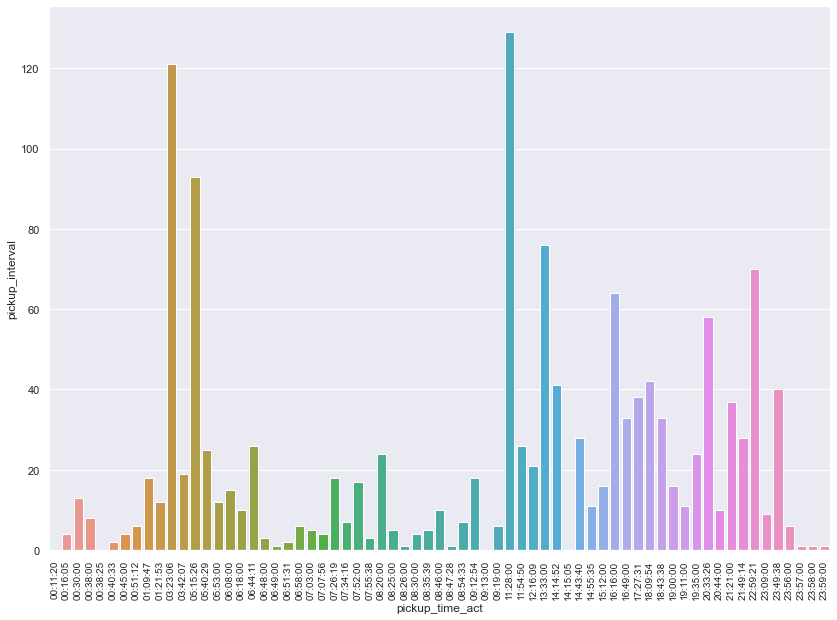

In [24]:
#Plot pick-up interval across a given day for a taxi zone 
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.barplot(x="pickup_time_act", y="delta_p",data=p_df) #dodge=False)
#ax.set_xticks(str(p_df["pickup_time_act"]))
ax.set_xticklabels( labels=list(p_df["pickup_time_act"]), rotation='vertical', fontsize=10)
ax.set_ylabel("pickup_interval")

Text(0, 0.5, 'dropoff_count')

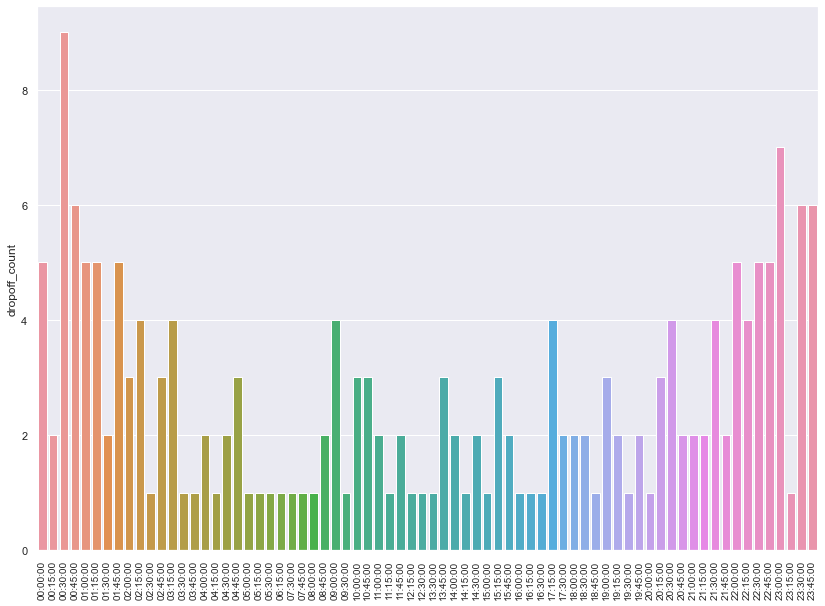

In [25]:
ax1 = sns.barplot(x=drop_counts.index, y="dropoff_time",data=drop_counts)
#ax.set_xticks( pd.to_datetime(drop_counts.index).dt.time)
ax1.set_xticklabels( labels=drop_counts.index, rotation='vertical', fontsize=10)
ax1.set_ylabel("dropoff_count")
